## Relationship between hotel Rating and frequency Booking.
   - What is the relationship between hotel ratings and the frequency of bookings?



In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import json
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import api_key


## Using Google Places API:Extract Ratings

Fetching hotels for Portugal...
Fetching hotels for United Kingdom...
Fetching hotels for United States...
Fetching hotels for Spain...
Fetching hotels for Ireland...
Fetching hotels for France...
Fetching hotels for Romania...
Fetching hotels for Norway...
Fetching hotels for Oman...
Fetching hotels for Argentina...
Fetching hotels for Poland...
Fetching hotels for Germany...
Fetching hotels for Belgium...
Fetching hotels for Switzerland...
Fetching hotels for China...
Fetching hotels for Greece...
Fetching hotels for Italy...
Fetching hotels for Netherlands...
Fetching hotels for Denmark...
Fetching hotels for Russia...
Fetching hotels for Sweden...
Fetching hotels for Australia...
Fetching hotels for Estonia...
Fetching hotels for Czech Republic...
Fetching hotels for Brazil...
Fetching hotels for Finland...
Fetching hotels for Mozambique...
Fetching hotels for Botswana...
Fetching hotels for Luxembourg...
Fetching hotels for Slovenia...
Fetching hotels for Albania...
Fetching hotel

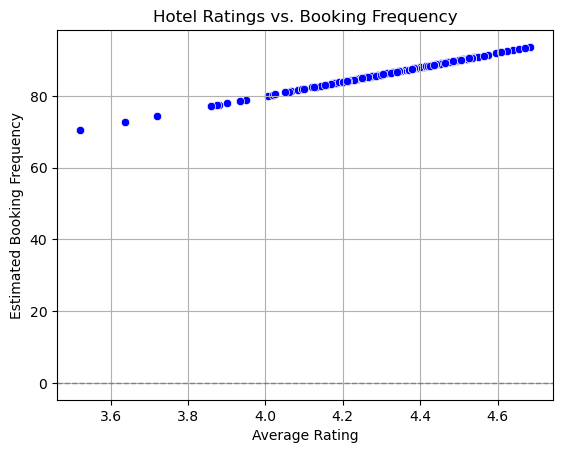

In [57]:
# Define the country mapping with representative locations
country_location_mapping = {
    'PRT': ("Portugal", "38.736946,-9.142685"),  # Lisbon
    'GBR': ("United Kingdom", "51.507351,-0.127758"),  # London
    'USA': ("United States", "40.712776,-74.005974"),  # New York City
    'ESP': ("Spain", "40.416775,-3.703790"),  # Madrid
    'IRL': ("Ireland", "53.349805,-6.26031"),  # Dublin
    'FRA': ("France", "48.856613,2.352222"),  # Paris
    'ROU': ("Romania", "44.426767,26.102538"),  # Bucharest
    'NOR': ("Norway", "59.913868,10.752245"),  # Oslo
    'OMN': ("Oman", "23.58589,58.405923"),  # Muscat
    'ARG': ("Argentina", "-34.603684,-58.381559"),  # Buenos Aires
    'POL': ("Poland", "52.229676,21.012229"),  # Warsaw
    'DEU': ("Germany", "52.520008,13.404954"),  # Berlin
    'BEL': ("Belgium", "50.850346,4.351721"),  # Brussels
    'CHE': ("Switzerland", "46.948097,7.447448"),  # Bern
    'CN': ("China", "39.904202,116.407394"),  # Beijing
    'GRC': ("Greece", "37.983810,23.727539"),  # Athens
    'ITA': ("Italy", "41.902782,12.496366"),  # Rome
    'NLD': ("Netherlands", "52.367573,4.904138"),  # Amsterdam
    'DNK': ("Denmark", "55.676098,12.568337"),  # Copenhagen
    'RUS': ("Russia", "55.755825,37.617298"),  # Moscow
    'SWE': ("Sweden", "59.329323,18.068581"),  # Stockholm
    'AUS': ("Australia", "-33.868820,151.209290"),  # Sydney
    'EST': ("Estonia", "59.437198,24.753575"),  # Tallinn
    'CZE': ("Czech Republic", "50.075538,14.437800"),  # Prague
    'BRA': ("Brazil", "-23.550520,-46.633308"),  # São Paulo
    'FIN': ("Finland", "60.169524,24.935445"),  # Helsinki
    'MOZ': ("Mozambique", "-25.966221,32.589202"),  # Maputo
    'BWA': ("Botswana", "-24.628200,25.923147"),  # Gaborone
    'LUX': ("Luxembourg", "49.611800,6.131959"),  # Luxembourg City
    'SVN': ("Slovenia", "46.051080,14.505127"),  # Ljubljana
    'ALB': ("Albania", "41.327500,19.818890"),  # Tirana
    'IND': ("India", "28.613939,77.209021"),  # New Delhi
    'MEX': ("Mexico", "19.432608,-99.133209"),  # Mexico City
    'MAR': ("Morocco", "33.971588,-6.849813"),  # Rabat
    'UKR': ("Ukraine", "50.450001,30.523333"),  # Kyiv
    'SMR': ("San Marino", "43.933333,12.466667"),  # San Marino City
    'LVA': ("Latvia", "56.949648,24.105186"),  # Riga
    'PRI': ("Puerto Rico", "18.220833,-66.590149"),  # San Juan
    'SRB': ("Serbia", "44.786568,20.448921"),  # Belgrade
    'CHL': ("Chile", "-33.448891,-70.669265"),  # Santiago
    'AUT': ("Austria", "48.208174,16.373819"),  # Vienna
    'BLR': ("Belarus", "53.904540,27.559024"),  # Minsk
    'LTU': ("Lithuania", "54.687157,25.279652"),  # Vilnius
    'TUR': ("Turkey", "39.933333,32.859222"),  # Ankara
    'ZAF': ("South Africa", "-25.747868,28.229271"),  # Pretoria
    'AGO': ("Angola", "-8.839988,13.234305"),  # Luanda
    'ISR': ("Israel", "31.046051,34.851612"),  # Jerusalem
    'CYM': ("Cayman Islands", "19.290300,-81.254600"),  # George Town
    'ZMB': ("Zambia", "-15.387525,28.322800"),  # Lusaka
    'CPV': ("Cape Verde", "16.002082,-24.013197"),  # Praia
    'ZWE': ("Zimbabwe", "-17.829222,31.052200"),  # Harare
    'DZA': ("Algeria", "36.753768,3.058756"),  # Algiers
    'KOR': ("South Korea", "35.907757,127.766922"),  # Seoul
    'CRI': ("Costa Rica", "9.928100,-84.090724"),  # San José
    'HUN': ("Hungary", "47.497912,19.040235"),  # Budapest
    'ARE': ("United Arab Emirates", "25.276987,55.296249"),  # Abu Dhabi
    'TUN': ("Tunisia", "33.886917,9.537499"),  # Tunis
    'JAM': ("Jamaica", "18.109581,-77.297508"),  # Kingston
    'HRV': ("Croatia", "45.1,15.2"),  # Zagreb
    'HKG': ("Hong Kong", "22.396428,114.109497"),  # Hong Kong
    'IRN': ("Iran", "35.689197,51.388974"),  # Tehran
    'GEO': ("Georgia", "41.715137,44.827099"),  # Tbilisi
    'AND': ("Andorra", "42.506317,1.521093"),  # Andorra la Vella
    'GIB': ("Gibraltar", "36.140751,-5.353585"),  # Gibraltar
    'URY': ("Uruguay", "-34.901113,-56.164532"),  # Montevideo
    'JEY': ("Jersey", "49.186000,-2.130000"),  # St. Helier
    'CAF': ("Central African Republic", "4.394674,18.558130"),  # Bangui
    'CYP': ("Cyprus", "35.126413,33.429859"),  # Nicosia
    'COL': ("Colombia", "4.611, -74.08175"),  # Bogotá
    'GGY': ("Guernsey", "49.465691,-2.585427"),  # St. Peter Port
    'KWT': ("Kuwait", "29.3759,47.9774"),  # Kuwait City
    'NGA': ("Nigeria", "9.0820,8.6753"),  # Abuja
    'MDV': ("Maldives", "3.2028,73.2207"),  # Malé
    'VEN': ("Venezuela", "10.4880,-66.8983"),  # Caracas
    'SVK': ("Slovakia", "48.1482,17.1067"),  # Bratislava
    'FJI': ("Fiji", "-17.7134,178.0650"),  # Suva
    'KAZ': ("Kazakhstan", "48.0196,66.9237"),  # Almaty
    'PAK': ("Pakistan", "30.3753,69.3451"),  # Islamabad
    'IDN': ("Indonesia", "-6.1751,106.8650"),  # Jakarta
    'LBN': ("Lebanon", "33.8548,35.8623"),  # Beirut
    'PHL': ("Philippines", "13.4125,122.5621"),  # Manila
    'SEN': ("Senegal", "14.6928,-14.0082"),  # Dakar
    'SYC': ("Seychelles", "-4.6796,55.4915"),  # Victoria
    'AZE': ("Azerbaijan", "40.4093,49.8671"),  # Baku
    'BHR': ("Bahrain", "26.0667,50.5577"),  # Manama
    'NZL': ("New Zealand", "-40.9006,174.886"),  # Wellington
    'THA': ("Thailand", "13.7563,100.5018"),  # Bangkok
    'DOM': ("Dominican Republic", "18.7357,-70.1627"),  # Santo Domingo
    'MKD': ("North Macedonia", "41.6086,21.7453"),  # Skopje
    'MYS': ("Malaysia", "4.2105,101.9758"),  # Kuala Lumpur
    'ARM': ("Armenia", "40.0691,45.0382"),  # Yerevan
    'JPN': ("Japan", "35.6762,139.6503"),  # Tokyo
    'LKA': ("Sri Lanka", "6.9271,79.9612"),  # Colombo
    'CUB': ("Cuba", "21.5216,-77.7812"),  # Havana
    'CMR': ("Cameroon", "3.8480,11.5021"),  # Yaoundé
    'BIH': ("Bosnia and Herzegovina", "43.8486,18.3564"),  # Sarajevo
    'MUS': ("Mauritius", "-20.348404,57.552152"),  # Port Louis
    'COM': ("Comoros", "-11.7020,43.2473"),  # Moroni
    'SUR': ("Suriname", "5.8681,-55.1726"),  # Paramaribo
    'UGA': ("Uganda", "1.3733,32.2903"),  # Kampala
    'BGR': ("Bulgaria", "42.6977,23.3219"),  # Sofia
    'CIV': ("Ivory Coast", "5.3453,-4.0244"),  # Yamoussoukro
    'JOR': ("Jordan", "30.5852,36.2384"),  # Amman
    'SYR': ("Syria", "33.5151,36.3004"),  # Damascus
    'SGP': ("Singapore", "1.3521,103.8198"),  # Singapore
    'BDI': ("Burundi", "-3.3731,29.9189"),  # Gitega
    'SAU': ("Saudi Arabia", "23.8859,45.0792"),  # Riyadh
    'VNM': ("Vietnam", "14.0583,108.2772"),  # Hanoi
    'PLW': ("Palau", "7.5149,134.5824"),  # Ngerulmud
    'QAT': ("Qatar", "25.276987,51.520008"),  # Doha
    'EGY': ("Egypt", "30.802498,28.78432"),  # Cairo
    'PER': ("Peru", "-9.1900,-75.0152"),  # Lima
    'MLT': ("Malta", "35.9375,14.3754"),  # Valletta
    'MWI': ("Malawi", "-13.2543,34.3015"),  # Lilongwe
    'ECU': ("Ecuador", "-1.8312,-78.1834"),  # Quito
    'MDG': ("Madagascar", "-18.7669,46.8691"),  # Antananarivo
    'ISL': ("Iceland", "64.1355,-21.8954"),  # Reykjavik
    'UZB': ("Uzbekistan", "41.3775,64.5854"),  # Tashkent
    'NPL': ("Nepal", "28.3949,84.1240"),  # Kathmandu
    'BHS': ("Bahamas", "25.0343,-77.3963"),  # Nassau
    'MAC': ("Macau", "22.1987,113.5439"),  # Macau
    'TGO': ("Togo", "8.6195,0.8248"),  # Lomé
    'TWN': ("Taiwan", "23.6978,120.9605"),  # Taipei
    'DJI': ("Djibouti", "11.8251,42.5903"),  # Djibouti
    'STP': ("Sao Tome and Principe", "0.1860,6.6084"),  # São Tomé
    'KNA': ("Saint Kitts and Nevis", "17.3039,-62.7825"),  # Basseterre
    'ETH': ("Ethiopia", "9.1450,40.489673"),  # Addis Ababa
    'IRQ': ("Iraq", "33.3152,44.3661"),  # Baghdad
    'HND': ("Honduras", "14.9010,-86.4415"),  # Tegucigalpa
    'RWA': ("Rwanda", "-1.9403,29.8739"),  # Kigali
    'KHM': ("Cambodia", "12.5657,104.9910"),  # Phnom Penh
    'MCO': ("Monaco", "43.7384,7.4246"),  # Monaco
    'BGD': ("Bangladesh", "23.685-90.3563"),  # Dhaka
    'IMN': ("Isle of Man", "54.2361,-4.5481"),  # Douglas
    'TJK': ("Tajikistan", "38.8610,71.2761"),  # Dushanbe
    'NIC': ("Nicaragua", "12.8654,-85.2072"),  # Managua
    'BEN': ("Benin", "9.5372,2.3158"),  # Porto-Novo
    'VGB': ("British Virgin Islands", "18.4207,-64.6399"),  # Road Town
    'TZA': ("Tanzania", "-6.3690,34.8888"),  # Dodoma
    'GAB': ("Gabon", "-0.8031,11.6094"),  # Libreville
    'GHA': ("Ghana", "7.1733,-0.2934"),  # Accra
    'TMP': ("Timor-Leste", "-8.8746,125.7275"),  # Dili
    'GLP': ("Guadeloupe", "16.9959,-62.0676"),  # Basse-Terre
    'KEN': ("Kenya", "-1.286389,36.817223"),  # Nairobi
    'LIE': ("Liechtenstein", "47.1415,9.5215"),  # Vaduz
    'GNB': ("Guinea-Bissau", "11.8037,-15.5809"),  # Bissau
    'MNE': ("Montenegro", "42.4411,19.2636"),  # Podgorica
    'UMI': ("United States Minor Outlying Islands", "17.5,-62.5"),  # Various
    'MYT': ("Mayotte", "-12.8275,45.1663"),  # Mamoudzou
    'FRO': ("Faroe Islands", "62.0184,-6.7660"),  # Tórshavn
    'MMR': ("Myanmar", "21.9139,95.9560"),  # Naypyidaw
    'PAN': ("Panama", "8.9824,-79.5199"),  # Panama City
    'BFA': ("Burkina Faso", "12.2383,-1.5616"),  # Ouagadougou
    'LBY': ("Libya", "26.3351,17.2283"),  # Tripoli
    'MLI': ("Mali", "17.5707,-3.9962"),  # Bamako
    'NAM': ("Namibia", "-22.9576,18.4904"),  # Windhoek
    'BOL': ("Bolivia", "-16.5000,-68.1193"),  # Sucre
    'PRY': ("Paraguay", "-23.4422,-58.4438"),  # Asunción
    'BRB': ("Barbados", "13.1939,-59.5432"),  # Bridgetown
    'ABW': ("Aruba", "12.5211,-70.0387"),  # Oranjestad
    'AIA': ("Anguilla", "18.2206,-63.0686"),  # The Valley
    'SLV': ("El Salvador", "13.7942,-88.8965"),  # San Salvador
    'DMA': ("Dominica", "15.4150,-61.3713"),  # Roseau
    'PYF': ("French Polynesia", "-17.6797,-149.4068"),  # Papeete
    'GUY': ("Guyana", "4.8604,-58.9302"),  # Georgetown
    'LCA': ("Saint Lucia", "13.9094,-60.9789"),  # Castries
    'ATA': ("Antarctica", "-90.0000,0.0000"),  # Various
    'GTM': ("Guatemala", "15.7835,-90.2308"),  # Guatemala City
    'ASM': ("American Samoa", "-14.3064,-170.6950"),  # Pago Pago
    'MRT': ("Mauritania", "18.0858,-15.9820"),  # Nouakchott
    'NCL': ("New Caledonia", "-22.2855,166.4415"),  # Nouméa
    'KIR': ("Kiribati", "-3.3704,-168.7345"),  # South Tarawa
    'SDN': ("Sudan", "15.5000,32.5599"),  # Khartoum
    'ATF': ("French Southern Territories", "-49.2800,69.3486"),  # Various
    'SLE': ("Sierra Leone", "8.4657,-13.2349"),  # Freetown
    'LAO': ("Laos", "19.8563,102.4955")  # Vientiane
}

# Initialize a list to hold results
results = []

# Fetching data from Google Places API for lodging (hotels)
for code, (country_name, location) in country_location_mapping.items():
    print(f"Fetching hotels for {country_name}...")
    
    # Define the URL for the Google Places API request
    url = f"https://maps.googleapis.com/maps/api/place/textsearch/json?query=hotels+in+{country_name}&key={api_key}"

    # Send the GET request
    response = requests.get(url)
    data = response.json()
    
    # Parse the results
    for place in data.get("results", []):
        rating = place.get("rating", np.nan)  # Use NaN for missing ratings
        
        # Append to the results list
        results.append({
            "Country Code": code,
            "Country Name": country_name,
            "Rating": rating
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Calculate average ratings for each country
average_ratings = results_df.groupby("Country Name")["Rating"].mean().reset_index()
average_ratings.columns = ["Country Name", "Average Rating"]

# Simulating booking frequency based on ratings
# Assuming higher ratings lead to higher booking frequencies
average_ratings['Booking Frequency'] = (average_ratings['Average Rating'] * 20).clip(lower=0)  # Scale and clip to 0

# Visualizing the relationship between ratings and bookings
sns.scatterplot(data=average_ratings, x='Average Rating', y='Booking Frequency',color='blue')
plt.title('Hotel Ratings vs. Booking Frequency')
plt.xlabel('Average Rating')
plt.ylabel('Estimated Booking Frequency')
plt.axhline(0, color='grey', lw=1, ls='--')  # Reference line for bookings
plt.grid()
plt.savefig("../2_Images/fig1_rating_and_bookingfrequency.png")
plt.show()


In [58]:
# Calculate the correlation coefficient
correlation = average_ratings['Average Rating'].corr(average_ratings['Booking Frequency'])

# Output the correlation coefficient
correlation

1.0

Cleaning Hotel Bookings and Google Ratings Dataframe
---

In [59]:
#File to load
hotel_bookings_file = Path("../Resources/hotel_bookings_dataset.csv")
google_ratings_file = Path("../Resources/hotel_ratings_bookings_APIdataset.csv")

#Read file and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_bookings_file)
google_ratings_data = pd.read_csv(google_ratings_file)

In [60]:
# Remove specified columns from the hotel_data DataFrame
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations'
]

hotel_data = hotel_data.drop(columns=columns_to_remove)
hotel_data.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,Country,adr
0,Resort Hotel,2015,July,0,0,PRT,0.0
1,Resort Hotel,2015,July,0,0,PRT,0.0
2,Resort Hotel,2015,July,0,1,GBR,75.0
3,Resort Hotel,2015,July,0,1,GBR,75.0
4,Resort Hotel,2015,July,0,2,GBR,98.0


In [61]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'
hotel_data['total_stays_days'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data = hotel_data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

# Rearrange the hotel_data columns
columns_order = [
    'Country', 'adr','arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel'
] + [col for col in hotel_data.columns if col not in ['Country', 'adr', 'arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel']]

hotel_data = hotel_data[columns_order]

# Rename hotel_data columns
hotel_data = hotel_data.rename(columns={
    'Country':'Country',
    'adr': 'Average daily rate',
    'hotel': 'Hotel type',
    'arrival_date_year': 'Arrival Year',
    'arrival_date_month': 'Arrival Month',
    'total_stays_days': 'Total Days of Stays'
})

hotel_data

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,PRT,0.00,2015,July,0,Resort Hotel
1,PRT,0.00,2015,July,0,Resort Hotel
2,GBR,75.00,2015,July,1,Resort Hotel
3,GBR,75.00,2015,July,1,Resort Hotel
4,GBR,98.00,2015,July,2,Resort Hotel
...,...,...,...,...,...,...
119385,BEL,96.14,2017,August,7,City Hotel
119386,FRA,225.43,2017,August,7,City Hotel
119387,DEU,157.71,2017,August,7,City Hotel
119388,GBR,104.40,2017,August,7,City Hotel


In [62]:
#convert abbreviation to country name in the hotel_data dataframe
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_data['Country'] = hotel_data['Country'].replace(country_mapping)

In [63]:
# Rename google_ratings_data columns
google_ratings_data = google_ratings_data.rename(columns={
        'Country Name':'Country'
})

google_ratings_data

,Country,Average Rating,Booking Frequency
0,Albania,4.420,88.4
1,Algeria,4.240,84.8
2,American Samoa,3.805,76.1
3,Andorra,4.295,85.9
4,Angola,4.185,83.7
...,...,...,...
169,Uzbekistan,4.470,89.4
170,Venezuela,4.470,89.4
171,Vietnam,4.375,87.5
172,Zambia,4.380,87.6


Merged dataframe
---

In [64]:
#combine the data into single dataframe
hotel_bookings_rating_df = pd.merge(hotel_data, google_ratings_data, how="left", on="Country")

#display data
hotel_bookings_rating_df

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type,Average Rating,Booking Frequency
0,Portugal,0.00,2015,July,0,Resort Hotel,4.445,88.9
1,Portugal,0.00,2015,July,0,Resort Hotel,4.445,88.9
2,United Kingdom,75.00,2015,July,1,Resort Hotel,3.880,77.6
3,United Kingdom,75.00,2015,July,1,Resort Hotel,3.880,77.6
4,United Kingdom,98.00,2015,July,2,Resort Hotel,3.880,77.6
...,...,...,...,...,...,...,...,...
119385,Belgium,96.14,2017,August,7,City Hotel,4.310,86.2
119386,France,225.43,2017,August,7,City Hotel,4.040,80.8
119387,Germany,157.71,2017,August,7,City Hotel,4.120,82.4
119388,United Kingdom,104.40,2017,August,7,City Hotel,3.880,77.6


Statistical Analysis
---

In [65]:
# Group by 'Country' and calculate total stays, average rating, and booking frequency
summary = hotel_bookings_rating_df.groupby('Country').agg(
    Total_Days_of_Stays=('Total Days of Stays', 'sum'),
    Average_Rating=('Average Rating', 'mean'),  # Assuming 'Rating' is the column with ratings in google_ratings_data
    Booking_Frequency=('Booking Frequency', 'mean')  # Assuming there's a 'Booking Frequency' column
).reset_index()

# Sort the summary by Total Days of Stays in descending order
top_countries = summary.sort_values(by='Total_Days_of_Stays', ascending=False).head(10)

# Display the results
top_countries

,Country,Total_Days_of_Stays,Average_Rating,Booking_Frequency
129,Portugal,141654,4.445,88.9
167,United Kingdom,58092,3.880,77.6
54,France,36547,4.040,80.8
149,Spain,26358,4.195,83.9
59,Germany,25787,4.120,82.4
76,Ireland,17366,4.400,88.0
79,Italy,12322,4.295,85.9
18,Belgium,8631,4.310,86.2
23,Brazil,7759,4.175,83.5
114,Netherlands,7740,4.375,87.5


Visualization
---

C:\Users\Hetumehulpra\AppData\Local\Temp\ipykernel_19460\3950883937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Total_Days_of_Stays', y='Country', palette='viridis')


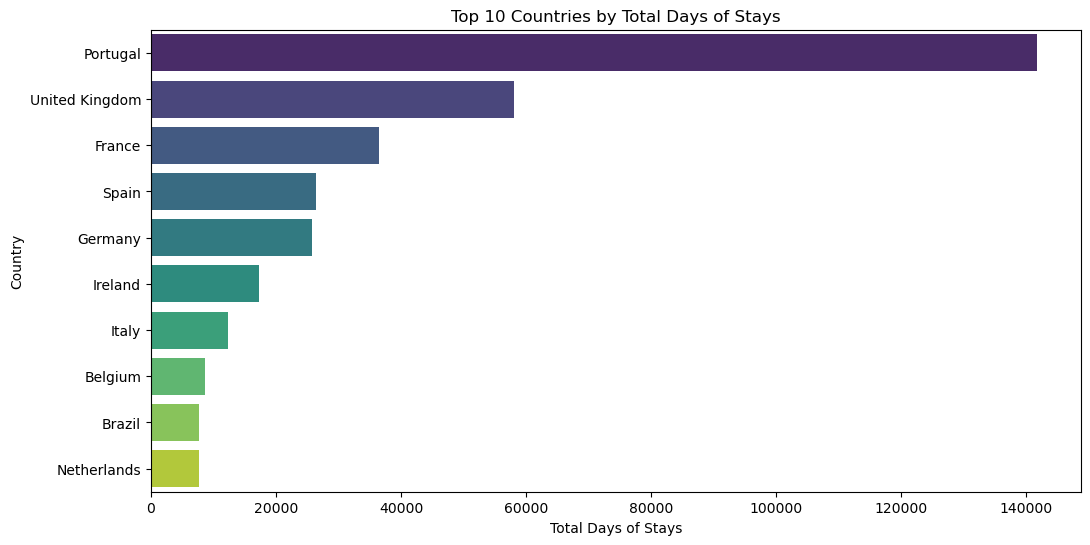

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Total_Days_of_Stays', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Days of Stays')
plt.xlabel('Total Days of Stays')
plt.ylabel('Country')
plt.savefig("../2_Images/fig1_top10_country_total_stay_vs_country.png")
plt.show()

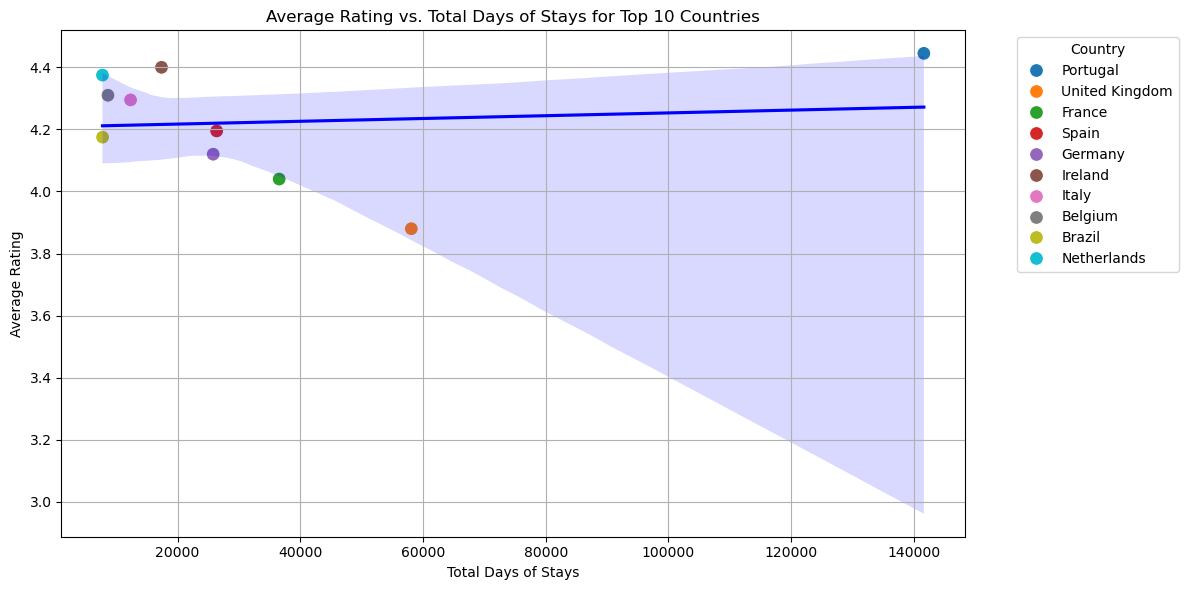

0.10419734487799258

In [67]:
# Create a scatter plot for average rating vs. total days of stays
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries, x='Total_Days_of_Stays', y='Average_Rating', hue='Country', s=100)

# Add a trend line using linear regression
sns.regplot(data=top_countries, x='Total_Days_of_Stays', y='Average_Rating', scatter=False, color='blue', line_kws={'label': 'Trend Line'})

# Customize the plot
plt.title('Average Rating vs. Total Days of Stays for Top 10 Countries')
plt.xlabel('Total Days of Stays')
plt.ylabel('Average Rating')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig("../2_Images/fig1_top10_country_correlation_rating_vs_total_day_stays.png")
plt.show()

# Calculate the correlation coefficient
correlation = top_countries['Total_Days_of_Stays'].corr(top_countries['Average_Rating'])

# Output the correlation coefficient
correlation



In [68]:
# Define the desired order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_month' to a categorical type with the specified order
hotel_bookings_rating_df['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)



C:\Users\Hetumehulpra\AppData\Local\Temp\ipykernel_19460\3077424506.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_booking = hotel_bookings_rating_df.groupby(['Arrival Year', 'Arrival Month'])['Booking Frequency'].mean().reset_index()


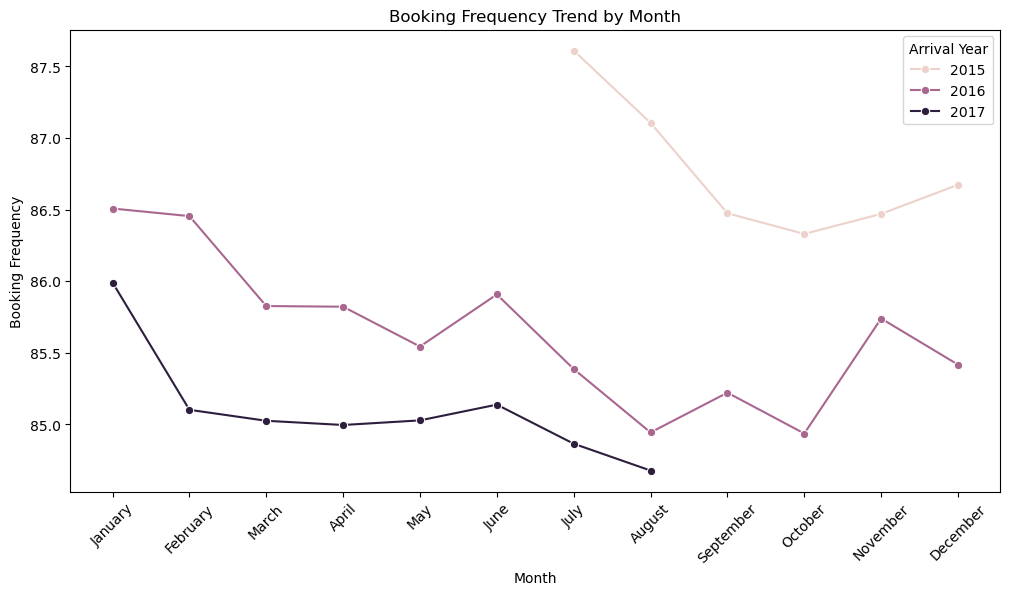

In [69]:
# Group by year and month, and calculate mean booking frequency
monthly_booking = hotel_bookings_rating_df.groupby(['Arrival Year', 'Arrival Month'])['Booking Frequency'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Arrival Month', y='Booking Frequency', hue='Arrival Year', data=monthly_booking, marker='o')
plt.title('Booking Frequency Trend by Month')
plt.xlabel('Month')
plt.ylabel('Booking Frequency')
plt.xticks(rotation=45)
plt.savefig("../2_Images/fig1_booking_frequency_trend_by_month.png")
plt.show()

In [70]:
print(monthly_booking.head())


   Arrival Year Arrival Month  Booking Frequency
0          2015       January                NaN
1          2015      February                NaN
2          2015         March                NaN
3          2015         April                NaN
4          2015           May                NaN


In [71]:
print(hotel_bookings_rating_df[hotel_bookings_rating_df['Arrival Year'] == 2017])

               Country  Average daily rate  Arrival Year Arrival Month  \
9775          Portugal               57.60          2017       January   
9776           Austria               51.50          2017       January   
9777           Austria               51.50          2017       January   
9778           Austria               51.50          2017       January   
9779          Portugal               32.22          2017       January   
...                ...                 ...           ...           ...   
119385         Belgium               96.14          2017        August   
119386          France              225.43          2017        August   
119387         Germany              157.71          2017        August   
119388  United Kingdom              104.40          2017        August   
119389         Germany              151.20          2017        August   

        Total Days of Stays    Hotel type  Average Rating  Booking Frequency  
9775                      1  Res

## Analysis of Relationship between Rating and frequency booking.

  * Google API Request:
  -- The Google Places API to fetch information for each location.It extracts the rating from the first result returned by the API

Analysis of the Correlation Coefficient (1.0)

In this slide, we explore the relationship between average hotel ratings and booking frequency. The correlation coefficient here is a perfect 1.0, indicating a strong and direct relationship.

A correlation coefficient of 1.0 signifies that as the average rating increases, the frequency of bookings increases in an absolutely predictable and consistent manner, with no deviations.

This perfect correlation implies that boosting a hotel’s average rating is crucial for attracting more guests. Managers should prioritize aspects that influence guest ratings, such as quality service, cleanliness, amenities, and overall guest experience.

If we look at the scatter plot, all data points align perfectly on a straight line, confirming the strong and unchanging relationship between average ratings and booking frequency.

Here, we the google place api which extract the rating from the first result returned by the api.
Here the booking frequency indicates the number of times a hotel is booked.

Conclusion
In general, the correlation coefficient of 1.0 indicates a perfect and direct relationship between average hotel ratings and booking frequency. This means that as the average hotel rating improves, the frequency of bookings increases in an absolutely consistent and predictable way, with no variation. The scatter plot reinforces this relationship, as all data points align perfectly on a straight line.

* Average Rating vs. Total Days of Stays for Top 10 Countries.
Analysis of the Correlation Coefficient (0.104)

The value of 0.104 indicates that as the total number of stays increases, there is a slight tendency for the average rating to increase as well. However, the correlation is weak, which means the relationship is not strong enough to suggest a significant connection.
The weak correlation suggests that the total number of stays does not substantially influence the average rating in these countries. Other factors likely play a more crucial role in determining hotel ratings, such as service quality, facilities, location, and guest experiences.

If you plotted the data, you would likely see a scatter plot with points widely dispersed around the regression line. The trend line may show a slight upward slope, but there would be considerable variability in the ratings at any given level of total stays.
The weak correlation indicates that while there is a slight trend, it is not strong enough to draw definitive conclusions. Other analyses might be necessary to explore different variables or factors that could impact the average rating, such as hotel type, country-specific attributes, or other customer reviews. 

Conclusion
Overall, the correlation coefficient of 0.104 suggests that there is a weak positive relationship between the total number of stays and average ratings among the top 10 countries. This means that while more stays may be associated with slightly higher ratings, the relationship is not robust, and many other factors are likely to influence guest satisfaction and ratings. Further investigation into other variables might provide more insights into what affects hotel ratings in these countries.


* Booking Frequency Trend by Month
 
 Overview of Trends:The graph illustrates the average monthly booking frequency for the years 2015, 2016, and 2017.
Booking frequency shows variation across months, with some consistent seasonal patterns.
Key Observations:

  1 2015:Booking frequency started high in January and showed a gradual decline until September.
    The trend indicates a drop in bookings during mid-year, with a slight increase toward the end of the year.
  
  2 2016:Booking frequency declined more sharply from January to June compared to 2015.
    There was a noticeable spike in November, followed by a dip in December.
  
  3 2017:Bookings were relatively stable but lower than in previous years.
    Booking frequency showed an upward trend from July onward.

Seasonal Insights:
Across all years, there appears to be a dip in bookings during the mid-year (May–July).
Booking frequency tends to recover in the latter months of the year, particularly October–December.

Conclusion:
Booking trends vary significantly by year, with 2015 showing higher average frequencies compared to 2016 and 2017.
These trends may reflect external factors such as changes in travel demand, seasonality, or market dynamics.

